# K-means

In [ ]:
# download data from kaggle:
# https://www.kaggle.com/abineshkumark/carsdata

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

# Importing the dataset
df = pd.read_csv('./data/cars.csv')
df.columns = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year', 'brand']
ds = df.shape
df = df[np.sum(df== " ", axis=1) != 1] # keep only rows without missing values
df.reset_index(inplace=True,drop=True)
print(f'dropped rows: {-df.shape[0]+ds[0]}')

dropped rows: 5


In [42]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [48]:
print(df.brand.unique())
colors = ['red','green','yellow']

[' US.' ' Europe.' ' Japan.']


In [90]:
x = df.iloc[:,:-1]
x = x.apply(pd.to_numeric) # convert values to numeric
y = df[['brand']]

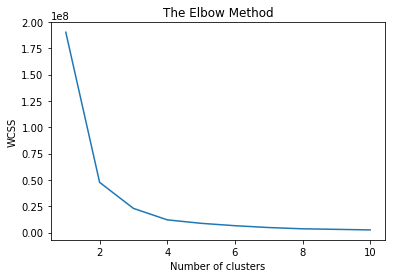

In [91]:
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


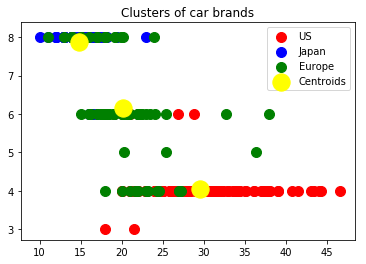

In [93]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) # n_init = #initalizations
y_kmeans = kmeans.fit_predict(x)

X = x.as_matrix(columns=None)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='US')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='Japan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()

### Visual recognition

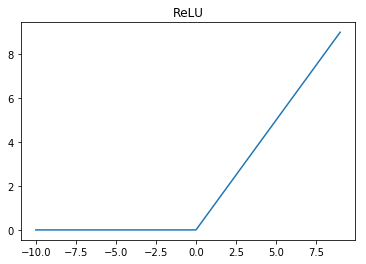

In [6]:
def ReLU(x):
    return x * (x > 0)

x=np.arange(-10, 10)
plt.plot(x, ReLU(x))
plt.title('ReLU')
plt.show()